# GSEA Pre-ranked DE genes

In [7]:
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import os
from gseapy.plot import barplot, dotplot

%matplotlib inline

In [6]:
datasetDir = './/HCC_AA//VS_rest//'
sample = 'HCC_AA'

C:\Users\kirst\Miniconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


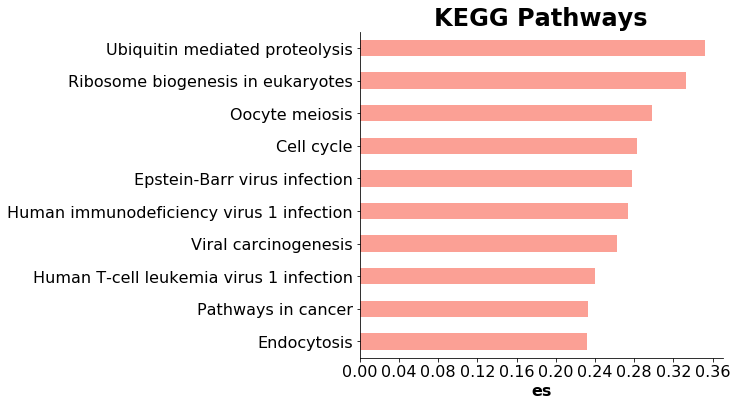

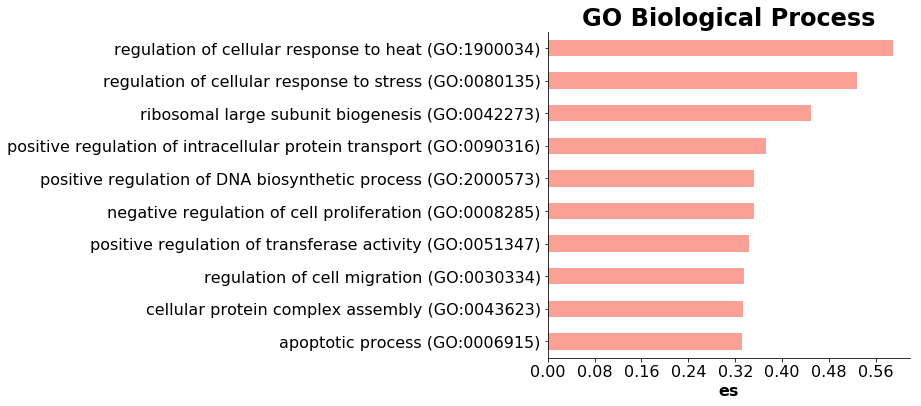

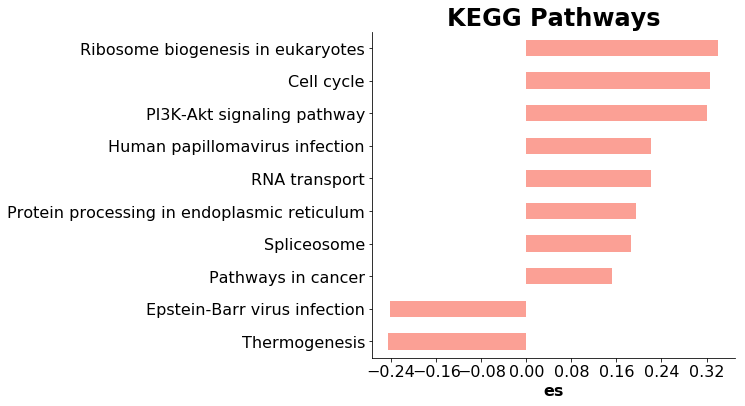

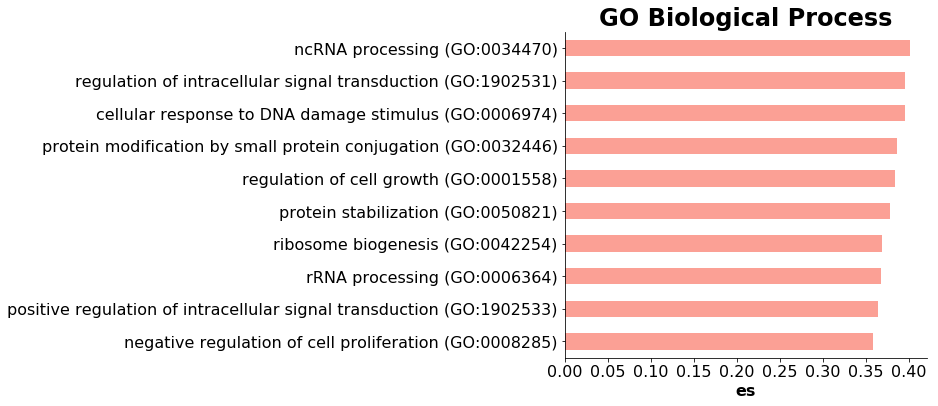

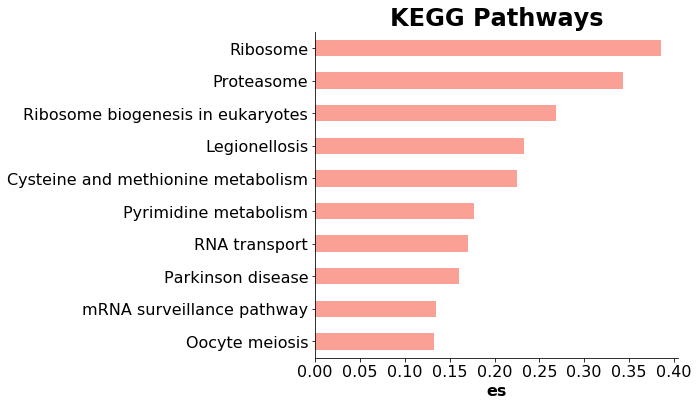

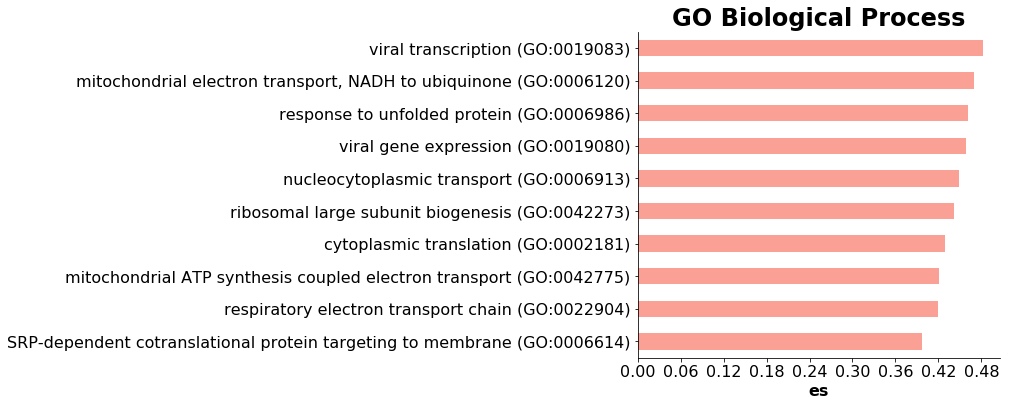

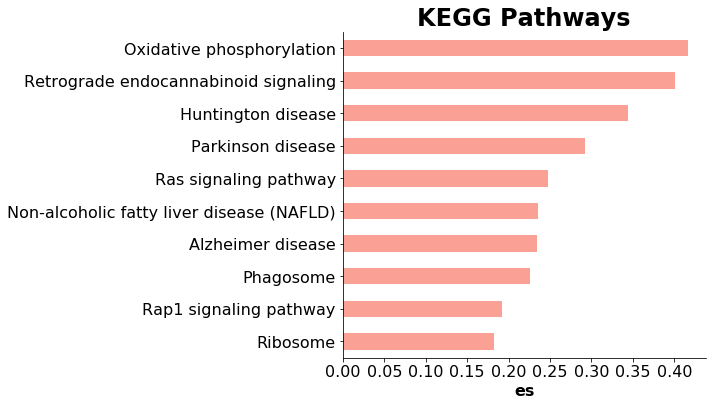

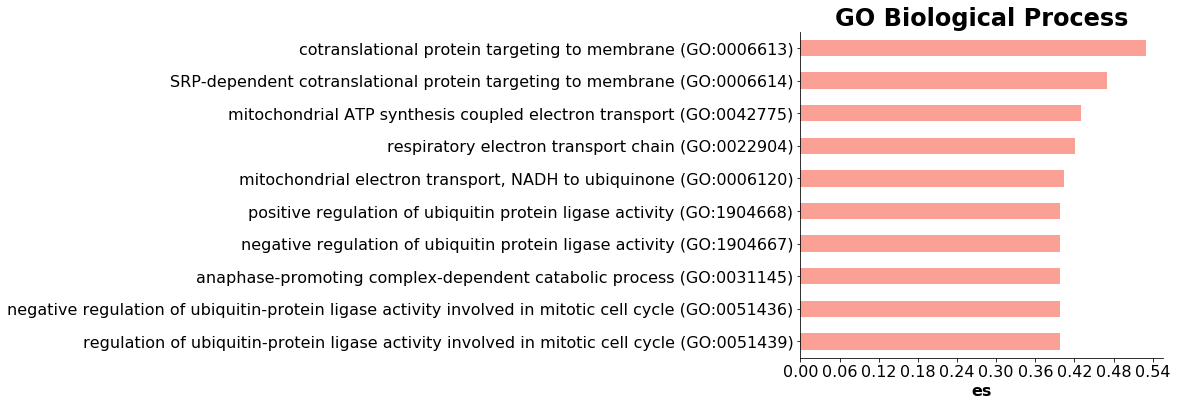

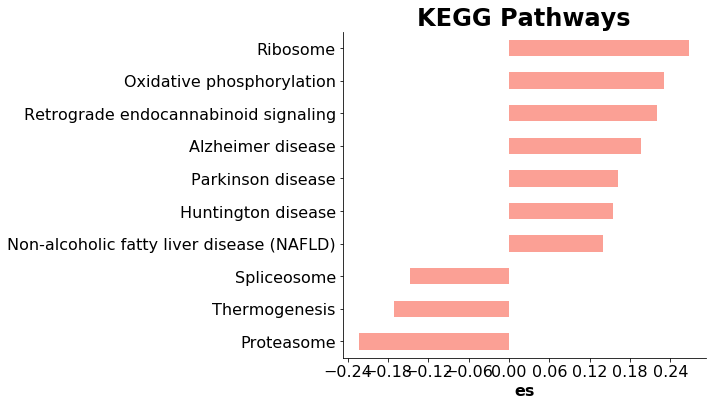

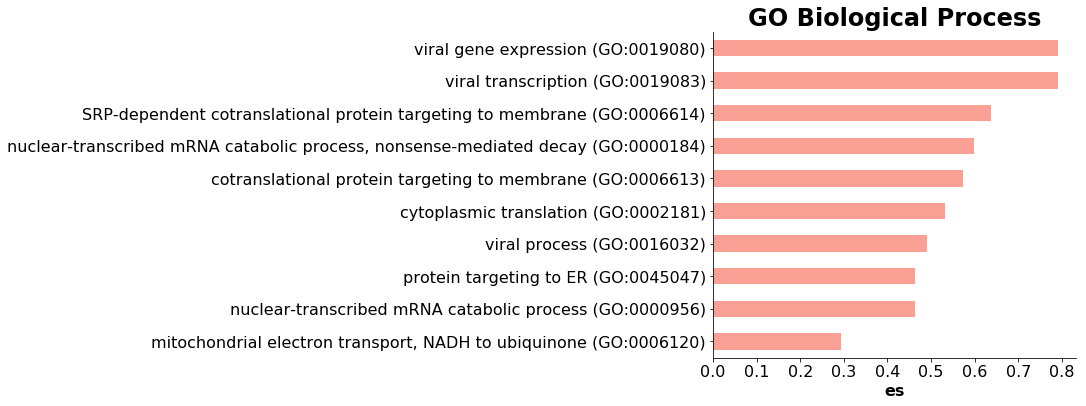

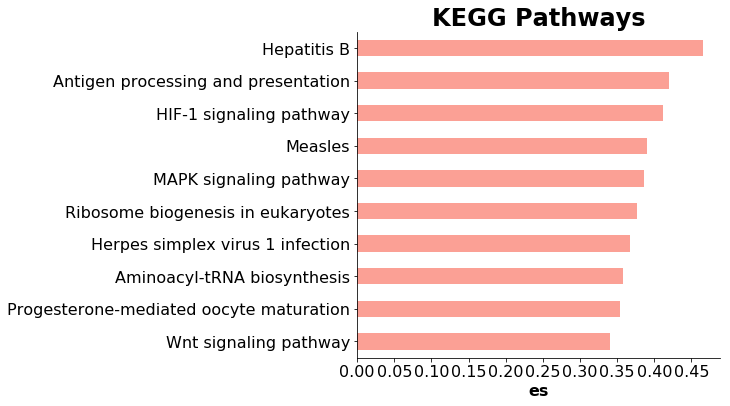

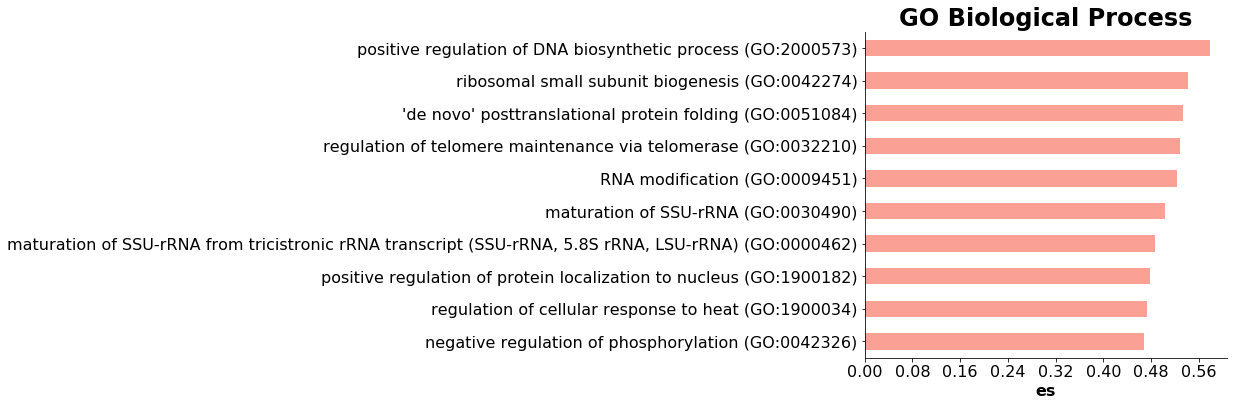

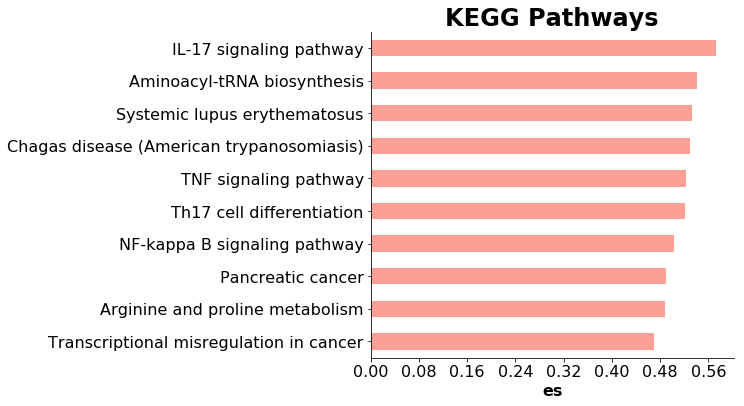

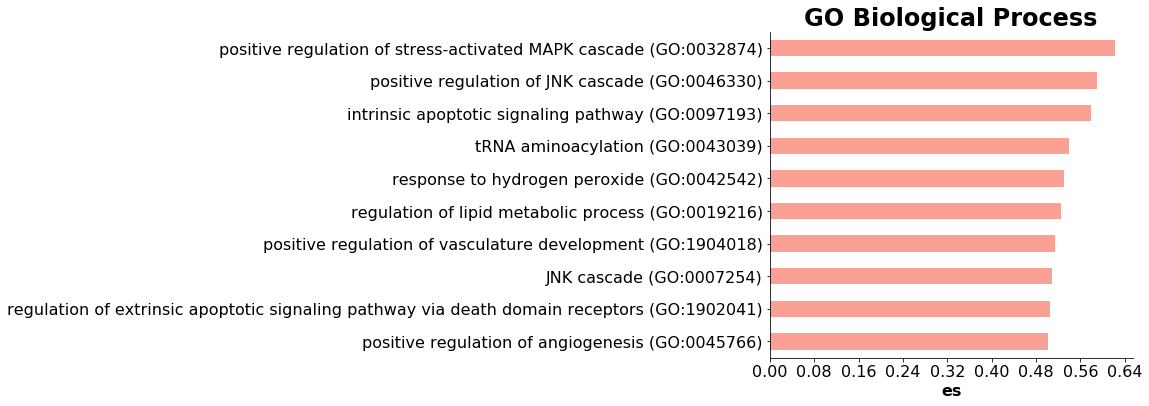

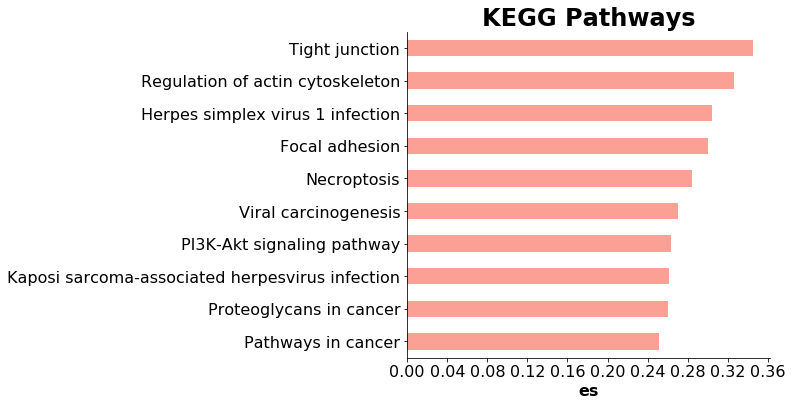

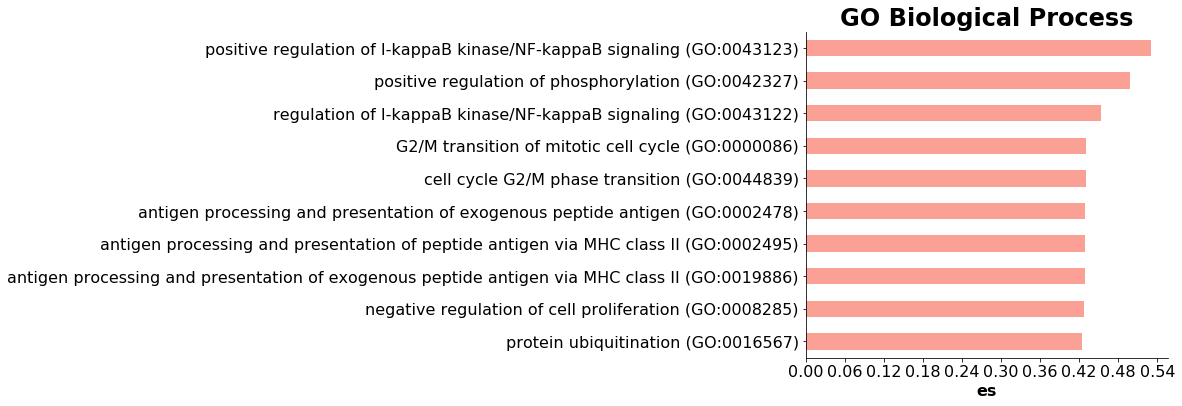

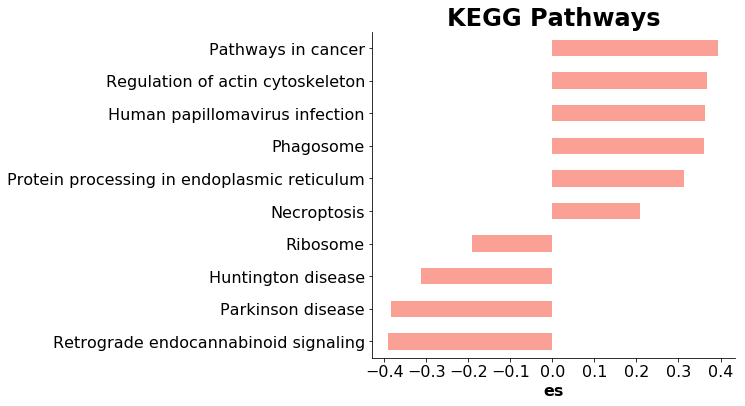

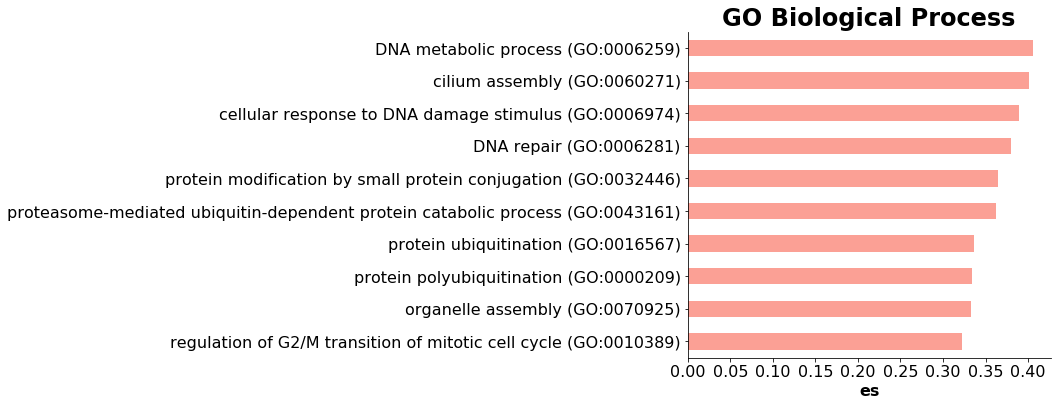

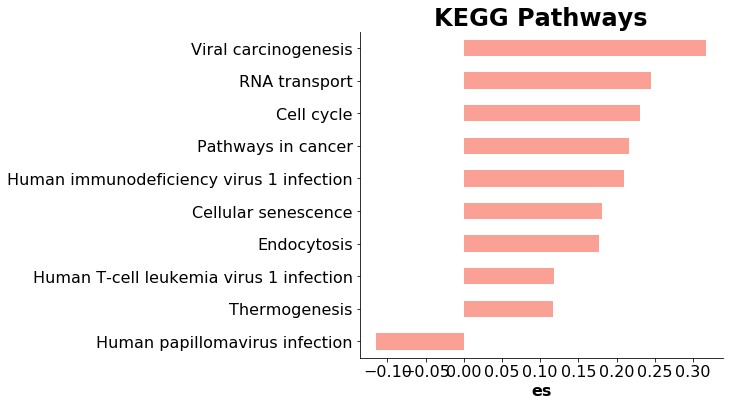

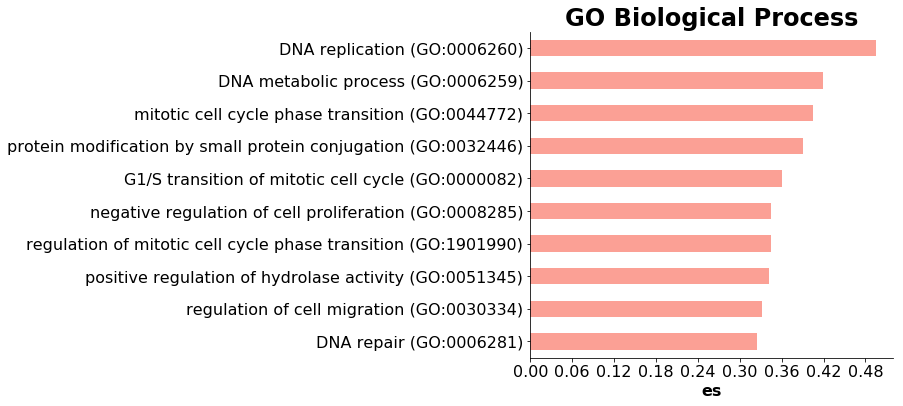

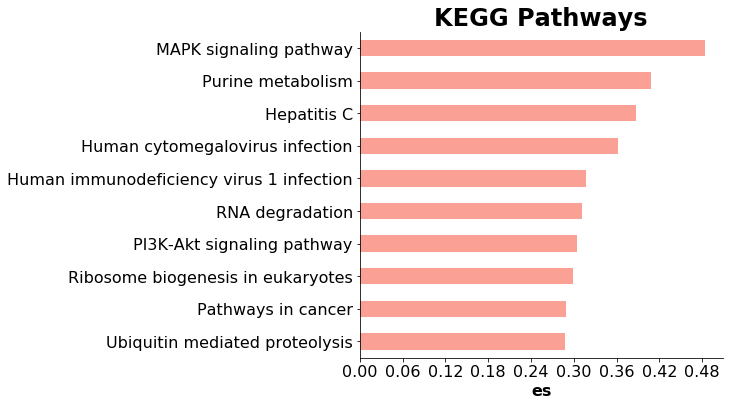

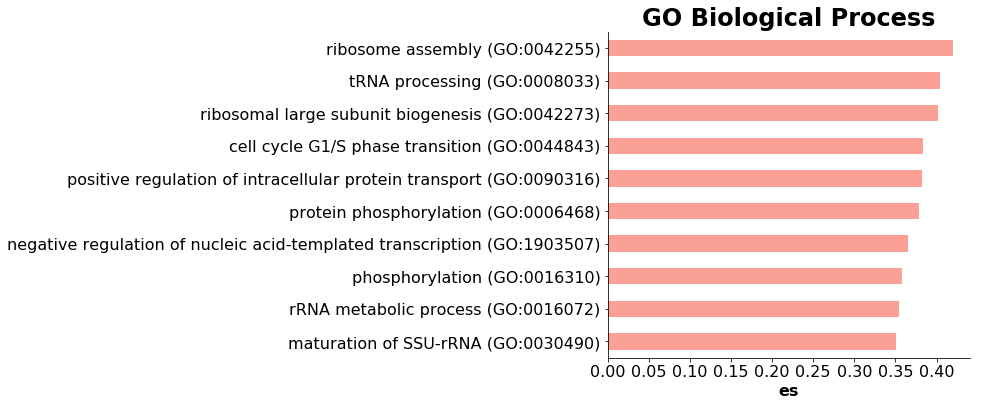

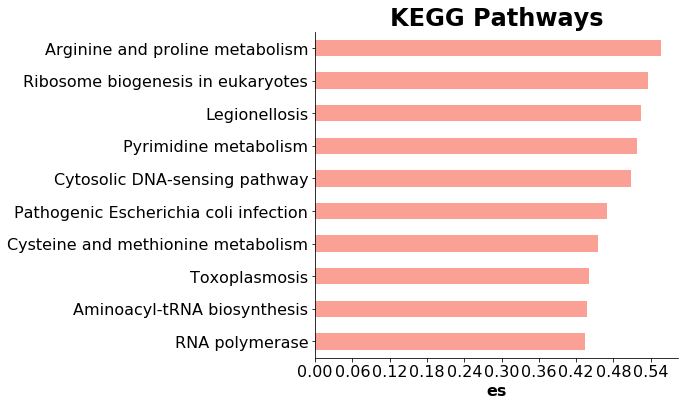

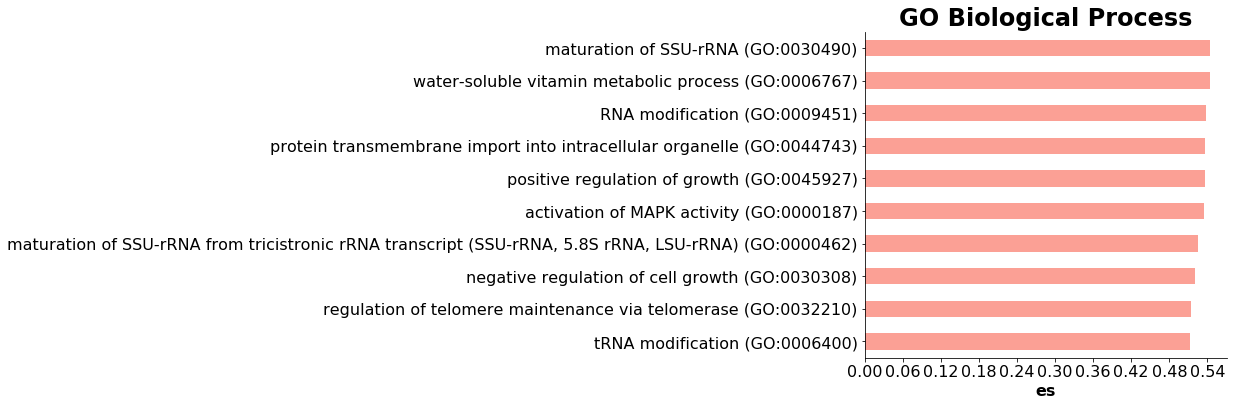

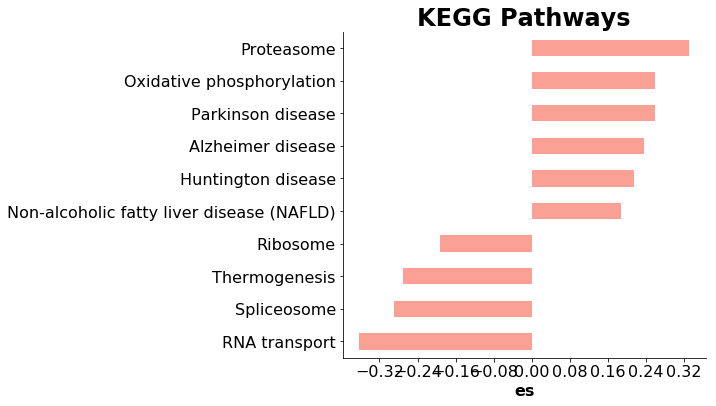

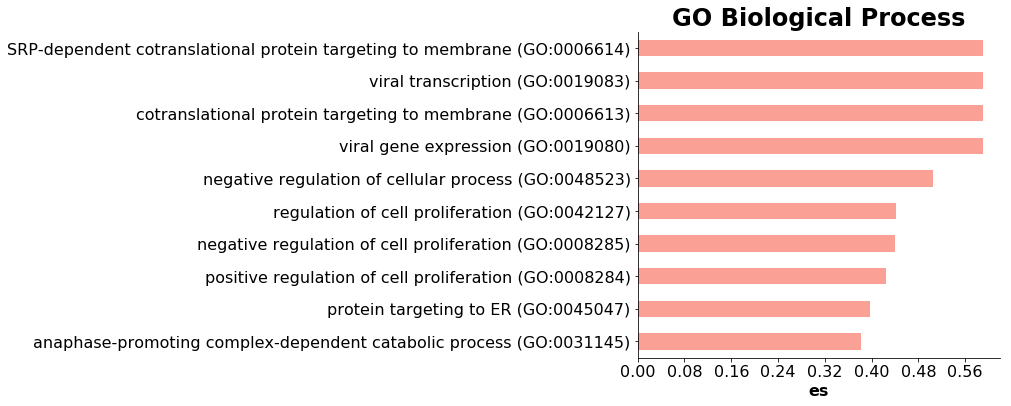

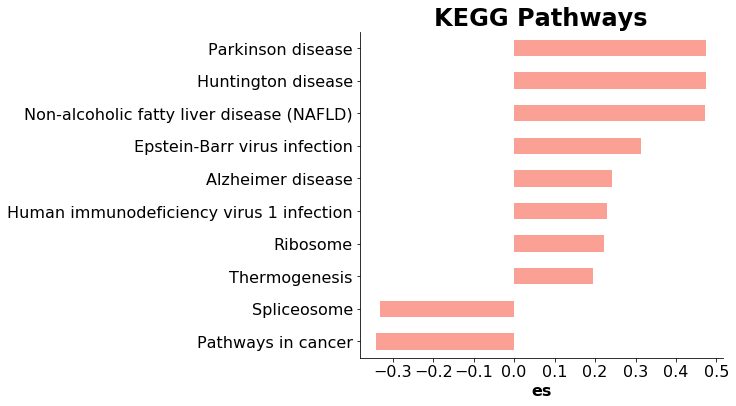

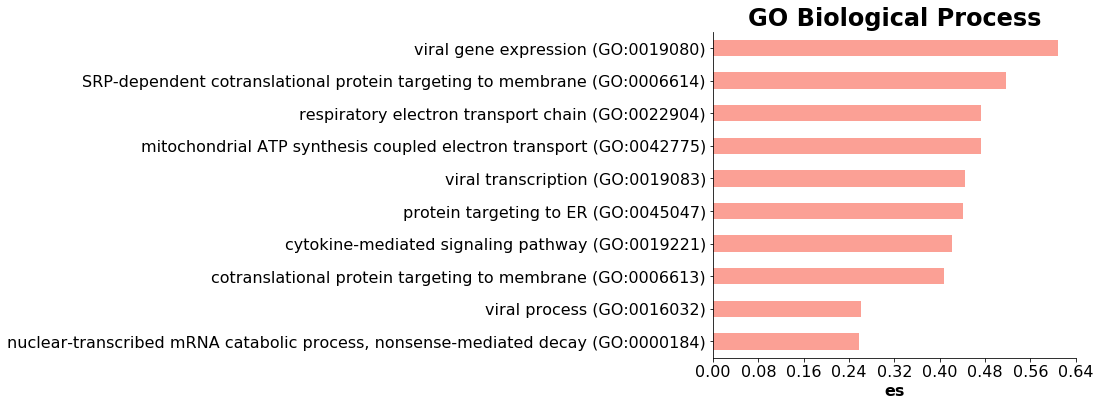

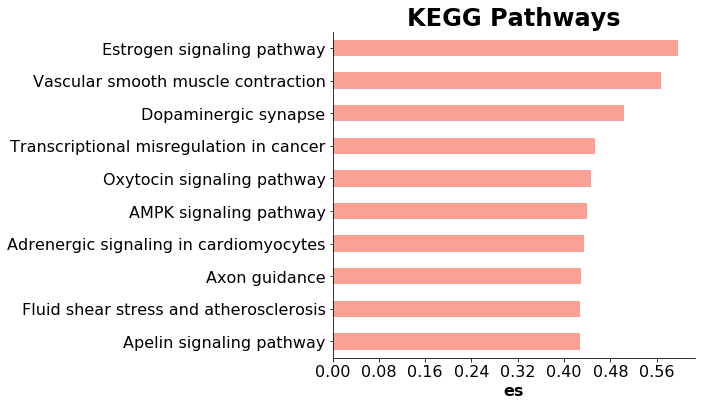

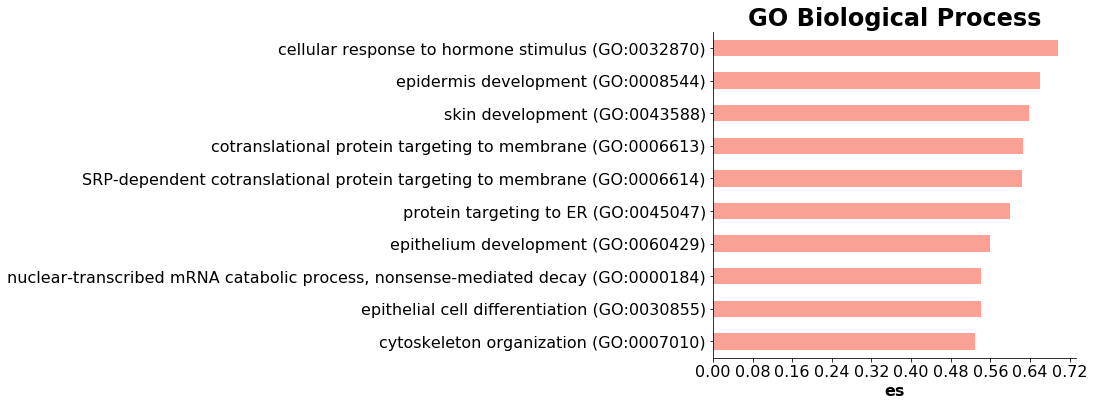

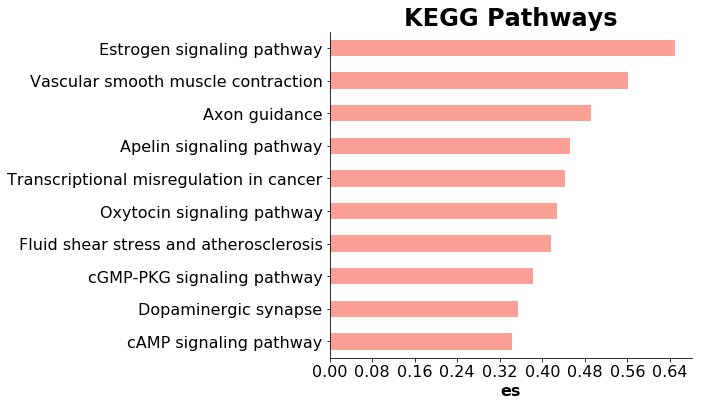

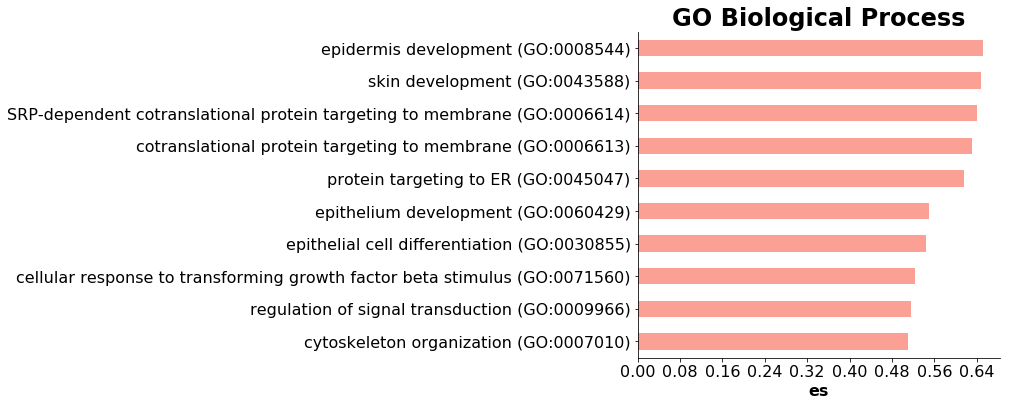

In [9]:
for file in os.listdir(datasetDir):
    if '.csv' in file:
        # Prerank gene list
        ## Only contains two columns, or one cloumn with gene_name indexed when assign a DataFrame to prerank
        rnk = pd.read_csv(datasetDir + file,index_col=0)
        rnk = rnk[['genes','logfoldchange']]
        
        # run prerank
        # enrichr libraries are supported by prerank module. Just provide the name
        # use 4 process to acceralate the permutation speed

        # note: multiprocessing may not work on windows
        pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2019_Human',
                             permutation_num=100, # reduce number to speed up testing
                             outdir='GSEA//'+sample+'//'+file.split('.')[0]+'_prerank_report_KEGG', format='png')

        pre_res2 = gp.prerank(rnk=rnk, gene_sets='GO_Biological_Process_2018',
                              permutation_num=100, # reduce number to speed up testing
                              outdir='GSEA//'+sample+'//'+file.split('.')[0]+'_prerank_report_GO', format='png')

        
        # Barplot
        barplot(pre_res.res2d.reset_index(),title='KEGG Pathways',column='es',)

        plt.savefig('GSEA//'+sample+'//'+file.split('.')[0]+'prerank_report_KEGG.png',bbox_inches='tight')

        barplot(pre_res2.res2d.reset_index(),title='GO Biological Process',column='es',)

        plt.savefig('GSEA//'+sample+'//'+file.split('.')[0]+'prerank_report_GO.png',bbox_inches='tight')

In [163]:

datasetDir = './/HCC_AA//VS_rest//'
filename = 'p-H_vs_p-L'

# filename = ['LM-H_vs_LM-L','LM-H_vs_p-L','p-H_vs_p-L',
#        '1_vs_p-L','4_vs_p-L','5_vs_p-L','7_vs_p-L','9_vs_p-L','10_vs_p-L','11_vs_p-L']

rnk = pd.read_csv(".//" + sample + "//pairwise//" + filename +".csv",index_col=0)
rnk = rnk[['genes','logfoldchange']]

In [164]:
# run prerank
# enrichr libraries are supported by prerank module. Just provide the name
# use 4 process to acceralate the permutation speed

# note: multiprocessing may not work on windows
pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2019_Human',
                     permutation_num=100, # reduce number to speed up testing
                     outdir='GSEA/'+sample+'/'+filename+'_prerank_report_KEGG', format='png')


In [165]:
pre_res2 = gp.prerank(rnk=rnk, 
                    gene_sets='GO_Biological_Process_2018',
                     permutation_num=100, # reduce number to speed up testing
                     outdir='GSEA/'+sample+'/'+filename+'_prerank_report_GO', format='png')



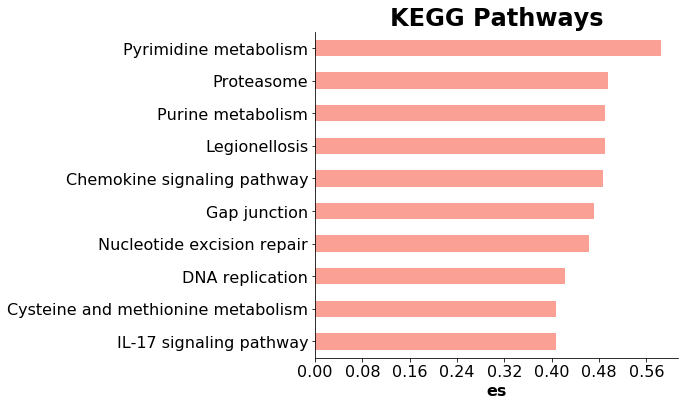

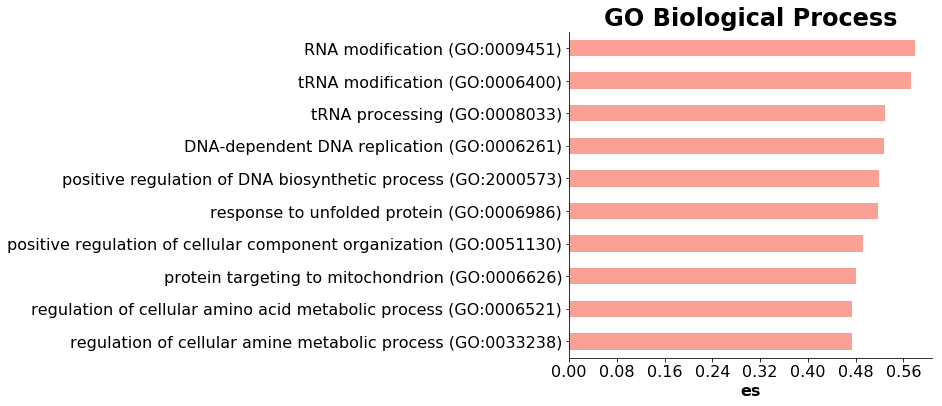

In [166]:
# simple plotting function
from gseapy.plot import barplot, dotplot

# to save your figure, make sure that ``ofname`` is not None
barplot(pre_res.res2d.reset_index(),title='KEGG Pathways',column='es',)

plt.savefig('GSEA/'+sample+'/'+filename+'_prerank_report_GO/prerank_report_KEGG.png',bbox_inches='tight')

barplot(pre_res2.res2d.reset_index(),title='GO Biological Process',column='es',)

plt.savefig('GSEA/'+sample+'/'+filename+'_prerank_report_GO/prerank_report_GO.png',bbox_inches='tight')